W tej analizie zostanie dokonany model klasyfikujący dotyczący zaakceptowania bądź odmowy roszczenia ubezpieczeniowego.

Zanonimizowane dane pochodzą z BNP Paribas Cadiff. Zbiór posiada 131 zmiennych objaśniających, zmienną reprezentującą unikalne ID każdego z roszczeń oraz zmienną objaśnianą o wartości 0 lub 1.


Zaimportowanie bibliotek

In [1]:
# Zaimportowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Zaimportowanie danych
trening_BNP = pd.read_csv('train_BNP.csv', sep=',')

In [3]:
# Wyświetlenie ramki danych zawierającej zbiór treningowy
trening_BNP.head(n=5)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# Określenie zmiennej przyporządkowującej dane roszczenie do grupy 1 lub 0.
roszczenia = trening_BNP['target']

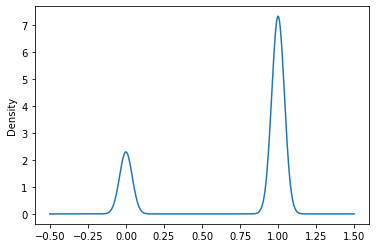

In [5]:
# Wizualizacja rozkładu roszczeń
wizualizacja = True

if wizualizacja:
    roszczenia.plot.kde()

In [6]:
#Przedstawienie wartości brakujących dla każdej zmiennej ze zbioru
trening_BNP.isnull().sum()

ID            0
target        0
v1        49832
v2        49796
v3         3457
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22         500
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          3
v108      48624
v109      48624
v110          0
v111      49832
v112        382
v113      55304
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125         77
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int6

In [7]:
# Obliczenie i przedstawienie liczby duplikatów danych istniejących w zbiorze
print('Zbiór zawiera %d duplikatów' % sum(trening_BNP.duplicated()))

Zbiór zawiera 0 duplikatów


In [8]:
# Podanie dokładnych informacji o zbiorze
trening_BNP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [9]:
# Przedstawienie liczebności zmiennej objaśnianej
trening_BNP.target.value_counts()

1    87021
0    27300
Name: target, dtype: int64

In [10]:
#Usunięcie nieistotnej kolumny określającej ID każdego z roszczeń
trening_BNP = trening_BNP.drop(['ID'], axis =1)

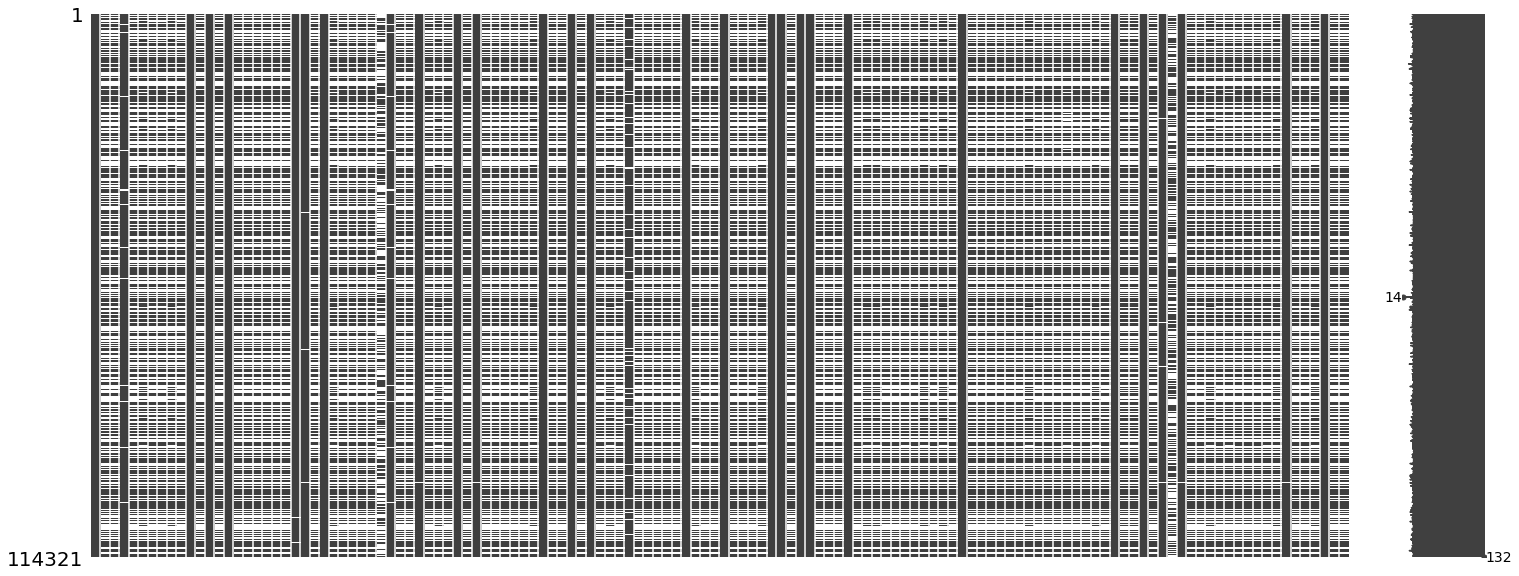

In [11]:
#Zaimportowanie biblioteki umożliwiającej wizualizację brakujących danych w zbiorze
import missingno as msno
# Wizualizacja brakujących wartości za pomocą pakietu msno
msno.matrix(trening_BNP)

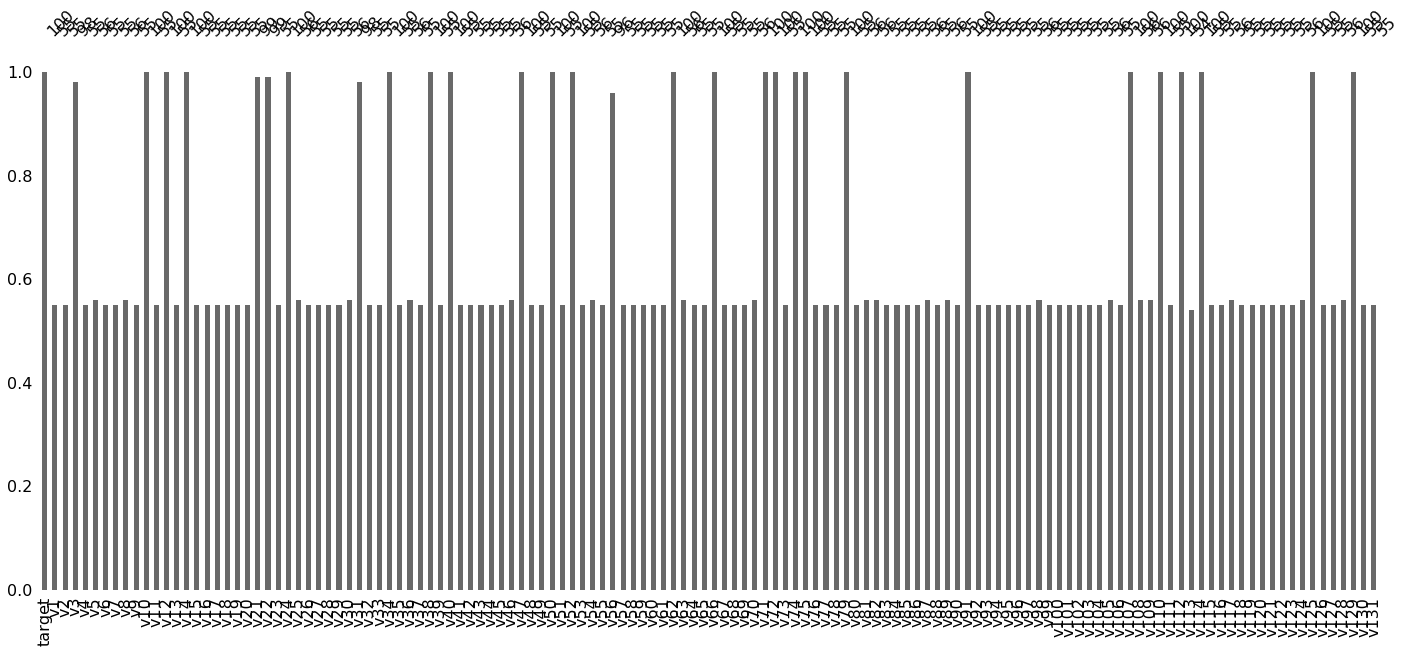

In [12]:
msno.bar(trening_BNP.sample(100))

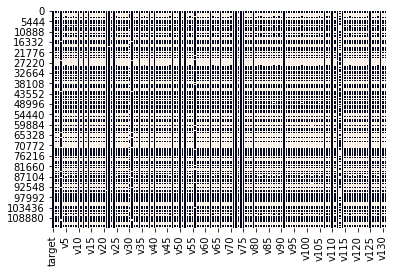

In [13]:
#Zaimportowanie biblioteki potrzebnej do przedstawienia brakujących wartości 
import seaborn as sns
# Użycie heatmapy do przedstawienia wartości brakujących w zbiorze danych
sns.heatmap(trening_BNP.isnull(), cbar=False)

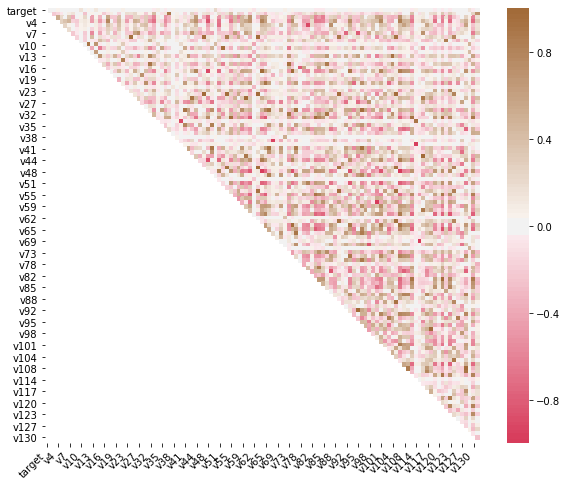

In [14]:
#Stworzenie zmiennej "korelacja" obliczającej zależność dla każdej pary zmiennych istniejących w zbiorze danych
korelacja = trening_BNP.corr()
#Ograniczenie zbioru danych do połowy (górny prawny trójkąt zbioru na wykresie)
ograniczenie_korelacja = korelacja.where(np.triu(np.ones(korelacja.shape), k=1).astype(np.bool))

#Narysowanie figury przedstawiającej zależności między zmiennymi
plt.figure(figsize = (10, 8))
ax = sns.heatmap(
    ograniczenie_korelacja, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(5, 400, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Brązowy kolor oznacza pozytywną korelację (większą od zera), natomiast różowy negatywną (mniejszą od zera)
# Skala zawiera się w przedziale od -1 do 1.
# Zmienne, które są silnie skorelowane (powyżej 90%) powinny być usunięte ze zbioru w celu ograniczenia czasu proce
# sowania danych a także polepszenia wyniku modelu klasyfikującego roszczenie


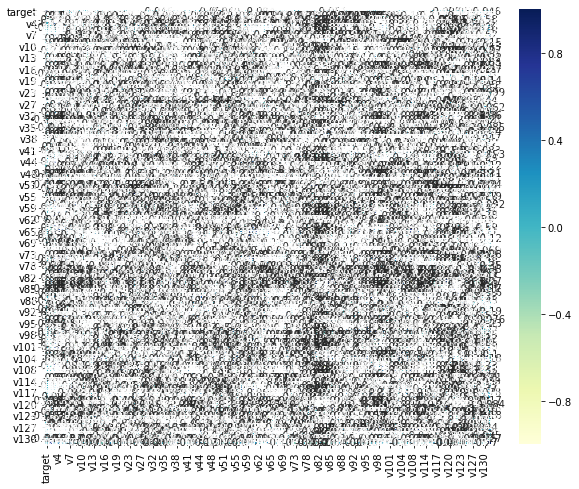

In [15]:
# Przedstawienie korelacji zmiennych w bardziej przejrzysty sposób ponownie za pomocą tak zwanej mapy cieplnej.
plt.figure(figsize=(10,8))
sns.heatmap(trening_BNP.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [16]:
#Sprawdzenie zależności między zmiennymi. Pzedstawienie w tabeli poszczególnych korelacji między używanymi zmiennymi.
korelacja = trening_BNP.corr().abs()
korelacja.style.background_gradient(cmap='coolwarm')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
ograniczenie_zbioru = korelacja.where(np.triu(np.ones(korelacja.shape), k=1).astype(np.bool))
#Odnalezienie indeksów kolumn, dla których korelacja przekroczyła 90%.
zmienne_eliminacja = [column for column in ograniczenie_zbioru.columns if any(ograniczenie_zbioru[column] > 0.90)]

In [18]:
len(zmienne_eliminacja)

38

In [19]:
#Przedstawienie zaproponowanych kolumn do usunięcia
zmienne_eliminacja

['v12',
 'v25',
 'v32',
 'v40',
 'v41',
 'v43',
 'v46',
 'v48',
 'v49',
 'v53',
 'v54',
 'v55',
 'v60',
 'v63',
 'v64',
 'v65',
 'v67',
 'v68',
 'v73',
 'v76',
 'v77',
 'v81',
 'v83',
 'v86',
 'v89',
 'v95',
 'v96',
 'v100',
 'v104',
 'v105',
 'v106',
 'v111',
 'v114',
 'v115',
 'v116',
 'v118',
 'v121',
 'v128']

In [20]:
# Ograniczenie zbioru poprzez usunięcie danych, które były silnie skorelowane
trening_BNP = trening_BNP.drop(trening_BNP[zmienne_eliminacja], axis=1)

In [21]:
#Przedstawienie ograniczonego zbioru danych
trening_BNP

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v120,v122,v123,v124,v125,v126,v127,v129,v130,v131
0,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,1.059603,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,0,0.636365,2.857144e+00
1,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,5.988956e-01,AF,NaN,NaN,0,NaN,NaN
2,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.138728,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,2,0.883118,1.176472e+00
3,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.166281,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1,1.677108,1.034483e+00
4,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Z,NaN,NaN,0,NaN,NaN
5,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,NaN,...,NaN,NaN,NaN,4.986116e-02,X,NaN,NaN,0,NaN,NaN
6,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,5.011287,...,0.846716,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,0,2.263736,9.708730e-01
7,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,BY,NaN,NaN,0,NaN,NaN
8,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,11.111111,...,1.414142,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,0,1.170731,3.333334e+00
9,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,9.977529,...,0.434782,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,0,3.174603,1.000000e+00


In [22]:
# Ze względu na duże braki danych należało stworzyć warunek dla którego brakujące dane zostały zamienione
# na sugerowane wartości -999. Algorytmy uczenia maszynowego nie są w stanie prawidłowo działać bez uprzedniego
# uporządkowania tych danych.

for (trening_BNP_name, trening_BNP_series)in (trening_BNP.iteritems()):
    if trening_BNP_series.dtype == 'O':
        #dla kolumn zawierających dane znakowe
        trening_BNP[trening_BNP_name], temporary_ind = pd.factorize(trening_BNP[trening_BNP_name])
        # obsłużenie grupy danych zawierających wartości nieznane typu "NaN"
    else:
        tmp_len = len(trening_BNP[trening_BNP_series.isnull()])
        if tmp_len>0:
            trening_BNP.loc[trening_BNP_series.isnull(), trening_BNP_name] = -999 

In [23]:
# Zweryfikowanie liczby wartości brakujących w zbiorze po wcześniejszym skonstruowaniu warunku temu zapobiegającemu 

wartosci_brakujace = []

for f in trening_BNP.columns:
    brakiDanych = trening_BNP[trening_BNP[f] == 'NaN'][f].count()
    if brakiDanych > 0:
        wartosci_brakujace.append(f)
        brakiDanych_procent = brakiDanych/trening_BNP.shape[0]
        
        print('Zmienna {} ma {} wierszy ({:.2%}) z brakującymi elementami'.format(f, brakiDanych, brakiDanych_procent))
        
print('Podsumowując, zbiór posiada {} zmiennych z brakującymi wartościami'.format(len(wartosci_brakujace)))

Podsumowując, zbiór posiada 0 zmiennych z brakującymi wartościami


f:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [24]:
# Wskazanie informacji o zbiorze danych
print("Zbiór posiada {} obserwacji i {} zmienne".format(trening_BNP.shape[0], trening_BNP.shape[1] - 1))

Zbiór posiada 114321 obserwacji i 93 zmienne


In [25]:
#Sprawdzenie duplikatów
print('Zbiór zawiera %d duplikatów' % sum(trening_BNP.duplicated()))

Zbiór zawiera 0 duplikatów


In [26]:
# Wydobycie zmiennej objaśnianej i wielkości egzogenicznych ze zbioru danych
X, y = trening_BNP.iloc[:, :-1], trening_BNP.iloc[:, -1 ]
print(X.shape)
print(y.shape)

(114321, 93)
(114321,)


In [27]:
# Zaimportowanie biblioteki umożliwiającej podział danych
from sklearn.model_selection import train_test_split
# Podział danych w proporcji 30% do 70% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3419)
print ("train_set_x wymiar: " + str(X_train.shape))
print ("train_set_y wymiar: " + str(y_train.shape))
print ("test_set_x wymiar: " + str(X_test.shape))
print ("test_set_y wymiar: " + str(y_test.shape))

train_set_x wymiar: (80024, 93)
train_set_y wymiar: (80024,)
test_set_x wymiar: (34297, 93)
test_set_y wymiar: (34297,)


In [28]:
# Pobranie biblioteki umożlwiającej skalowanie danych.
from sklearn.preprocessing import StandardScaler
# Skalowanie danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standaryzacja zbioru danych jest powszechnym wymogiem dla wielu estymatorów uczenia maszynowego: mogą zachowywać się one nieodpowiednio, jeśli poszczególne cechy nie będą wyglądać mniej więcej tak, jak standardowe dane o rozkładzie normalnym, to jest nie będą charakteryzować się rozkładem o średniej równej 0 oraz wariancją równą 1. 

In [29]:
# Zdefiniowanie modelu uczącego
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

# Inicjalizacja modelu
    model = classifier(**kwargs)
    
# Trening modelu
    model.fit(X_train,y_train)
    
# Sprawdzenie dokładności modelu a następnie przedstawienie przy pomocy metody print wartości
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
        
    return model

In [30]:
# Zaimportowanie bibliotek umożliwiających skonstruowanie różnych typów modeli
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
from sklearn import utils
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[17157 31241     0 ... 26077     0 11678]
continuous
multiclass
multiclass


In [32]:
#Sprawdzenie zależności między zmiennymi. Pzedstawienie w tabeli poszczególnych korelacji liczbowych
# między używanymi zmiennymi.
korelacja = trening_BNP.corr().abs()
korelacja.style.background_gradient(cmap='coolwarm')

In [33]:
# Stworzenie listy zmiennych wchodzących w skład ostatecznego modelu
zmienne_model = ['target', 'v10', 'v14', 'v21', 'v22', 'v24', 'v30', 'v31', 'v34', 'v38', 'v47', 'v50', 'v52', 'v56', 'v62', 
'v66', 'v72', 'v74', 'v75', 'v79', 'v107','v112', 'v113',  'v129']

In [34]:
# Podział danych uwzględniający zmienne o wysokiej istotności
train_X = trening_BNP.loc[:,zmienne_model]
train_y = trening_BNP.target

In [35]:
train_X

,target,v10,v14,v21,v22,v24,v30,v31,v34,v38,...,v62,v66,v72,v74,v75,v79,v107,v112,v113,v129
0,1,0.503281,11.636387,7.730923,0,0,0,0,7.270147,0,...,1,0,1,0,0,0,0,0,-1,0
1,1,1.312910,11.636386,6.763110,1,0,0,0,3.615077,0,...,2,1,2,0,0,1,1,1,0,0
2,1,0.765864,9.603542,5.245035,2,1,-1,0,4.043864,0,...,1,1,3,0,1,0,2,2,-1,2
3,1,6.542669,14.094723,7.517125,3,2,0,1,8.703550,0,...,1,1,2,0,0,2,1,3,-1,1
4,1,1.050328,10.991098,6.414567,4,1,-1,0,6.083151,0,...,1,0,1,0,0,3,2,4,0,0
5,0,1.050328,11.916255,7.351426,5,3,-1,0,7.496613,0,...,1,1,1,0,0,4,2,5,1,0
6,0,2.341356,12.148604,6.661479,6,1,1,0,3.964911,0,...,2,1,2,0,0,0,1,6,-1,0
7,1,1.838074,12.793945,7.806704,7,2,0,0,11.077506,0,...,2,0,2,0,0,3,0,7,2,0
8,0,4.463894,12.603403,6.034953,8,1,-1,-1,6.952621,0,...,0,2,0,0,1,5,3,8,-1,0
9,1,2.363238,13.790046,8.312447,9,0,0,0,6.498729,0,...,3,1,3,0,0,3,0,3,3,0


In [36]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.25, train_size=0.75, random_state=123)

f:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
print ("train_set_x wymiar: " + str(train_X.shape))
print ("train_set_y wymiar: " + str(train_y.shape))
print ("test_set_x wymiar: " + str(test_X.shape))
print ("test_set_y wymiar: " + str(test_y.shape))

train_set_x wymiar: (85740, 24)
train_set_y wymiar: (85740,)
test_set_x wymiar: (28581, 24)
test_set_y wymiar: (28581,)


In [38]:
# Pobranie biblioteki umożlwiającej skalowanie danych.
from sklearn.preprocessing import StandardScaler
# Skalowanie danych
skalar = StandardScaler()
train_X = skalar.fit_transform(train_X)
test_X = skalar.transform(test_X)

In [39]:
# Stworzenie modelu, określenie najlepszych możliwych parametrów 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier(learning_rate =0.001, n_estimators=200, max_depth=10,
 min_child_weight=1.5, gamma=0, reg_alpha=0.01, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
 nthread=4, scale_pos_weight=1)

In [40]:
# Trening modelu
XGB.fit(train_X, train_y, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.001, max_delta_step=0, max_depth=10,
       min_child_weight=1.5, missing=None, n_estimators=200, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [41]:
# Określenie dokładności każdej ze zmiennych uczestniczących w treningu modelu
prawdopodobienstwo_xgb = XGB.predict_proba(test_X)[:,1]

In [42]:
# Wyświetlenie obliczonych wyników
prawdopodobienstwo_xgb

array([0.58167195, 0.423824  , 0.58448744, ..., 0.5864959 , 0.5753822 ,
       0.5836369 ], dtype=float32)

In [43]:
# Zaimportowanie bibliotek służących do przedstawienia metryki wyniku
from sklearn import preprocessing, metrics
# Przedstawienie wyniku dotyczącego dokładności modelu
print(metrics.log_loss(test_y, prawdopodobienstwo_xgb))

0.5422373020867096
